In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Utilities.operators import make_tree

In [2]:
mach_min = 1.3
gamma = 5/3
save = False
folder = 'TDE'
is_tde = True
snap = '196'
m=5
path = f'{folder}/{snap}'


In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, IE, Den, Press, Temp, Diss = make_tree(path, snap, is_tde, energy = True)
dim_cell = Vol**(1/3)

In [25]:
# Import data
shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')

idx_zone = shockzone[0]
idx_zone = np.array([int(i) for i in idx_zone])
x_zone = X[idx_zone]
y_zone = Y[idx_zone]
z_zone = Z[idx_zone]
Diss_zone = Diss[idx_zone]
dim_cell_zone = dim_cell[idx_zone]


In [26]:
X_cross = X[np.abs(Z) < dim_cell]
Y_cross = Y[np.abs(Z) < dim_cell]
Vol_cross = Vol[np.abs(Z) < dim_cell]
Den_cross = Den[np.abs(Z) < dim_cell]
Diss_cross = Diss[np.abs(Z) < dim_cell]

zone_cross_x = x_zone[np.abs(z_zone)< dim_cell_zone]
zone_cross_y = y_zone[np.abs(z_zone)< dim_cell_zone]

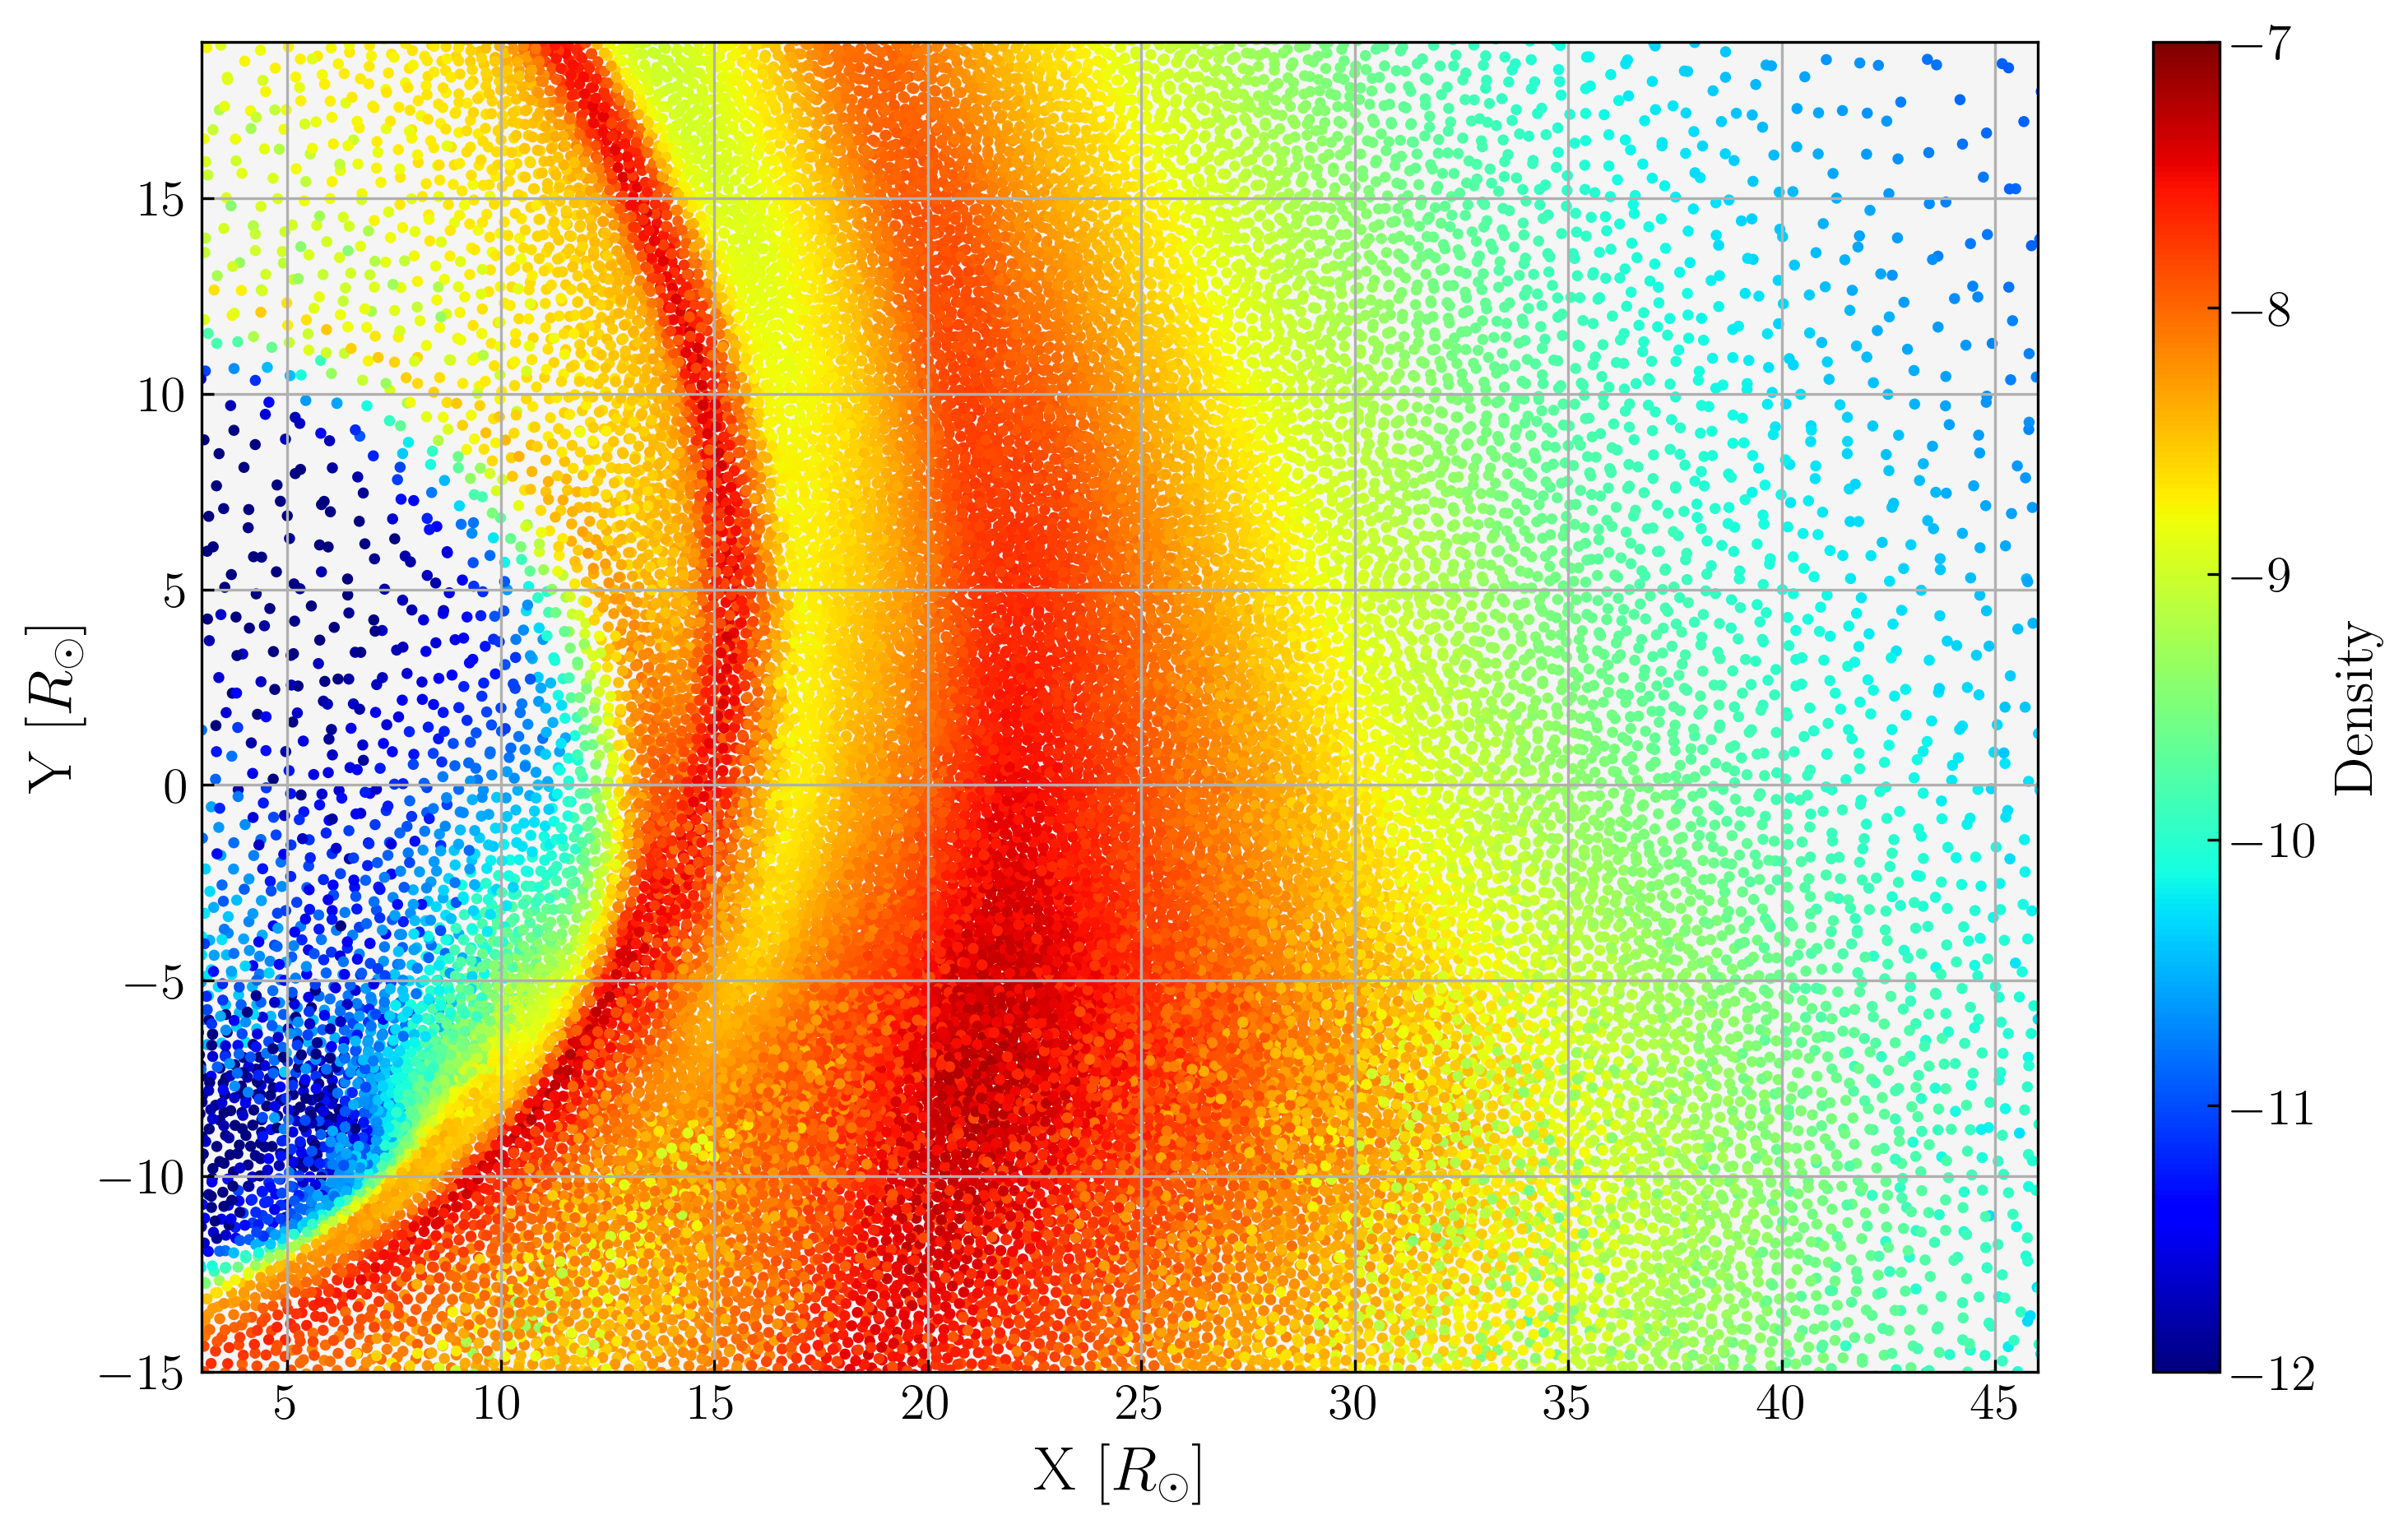

In [31]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 5, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('Density', fontsize = 16)
#ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k')
ax.set_xlim(3,46)
ax.set_ylim(-15,19)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.savefig('Figs/EladDensity.png')

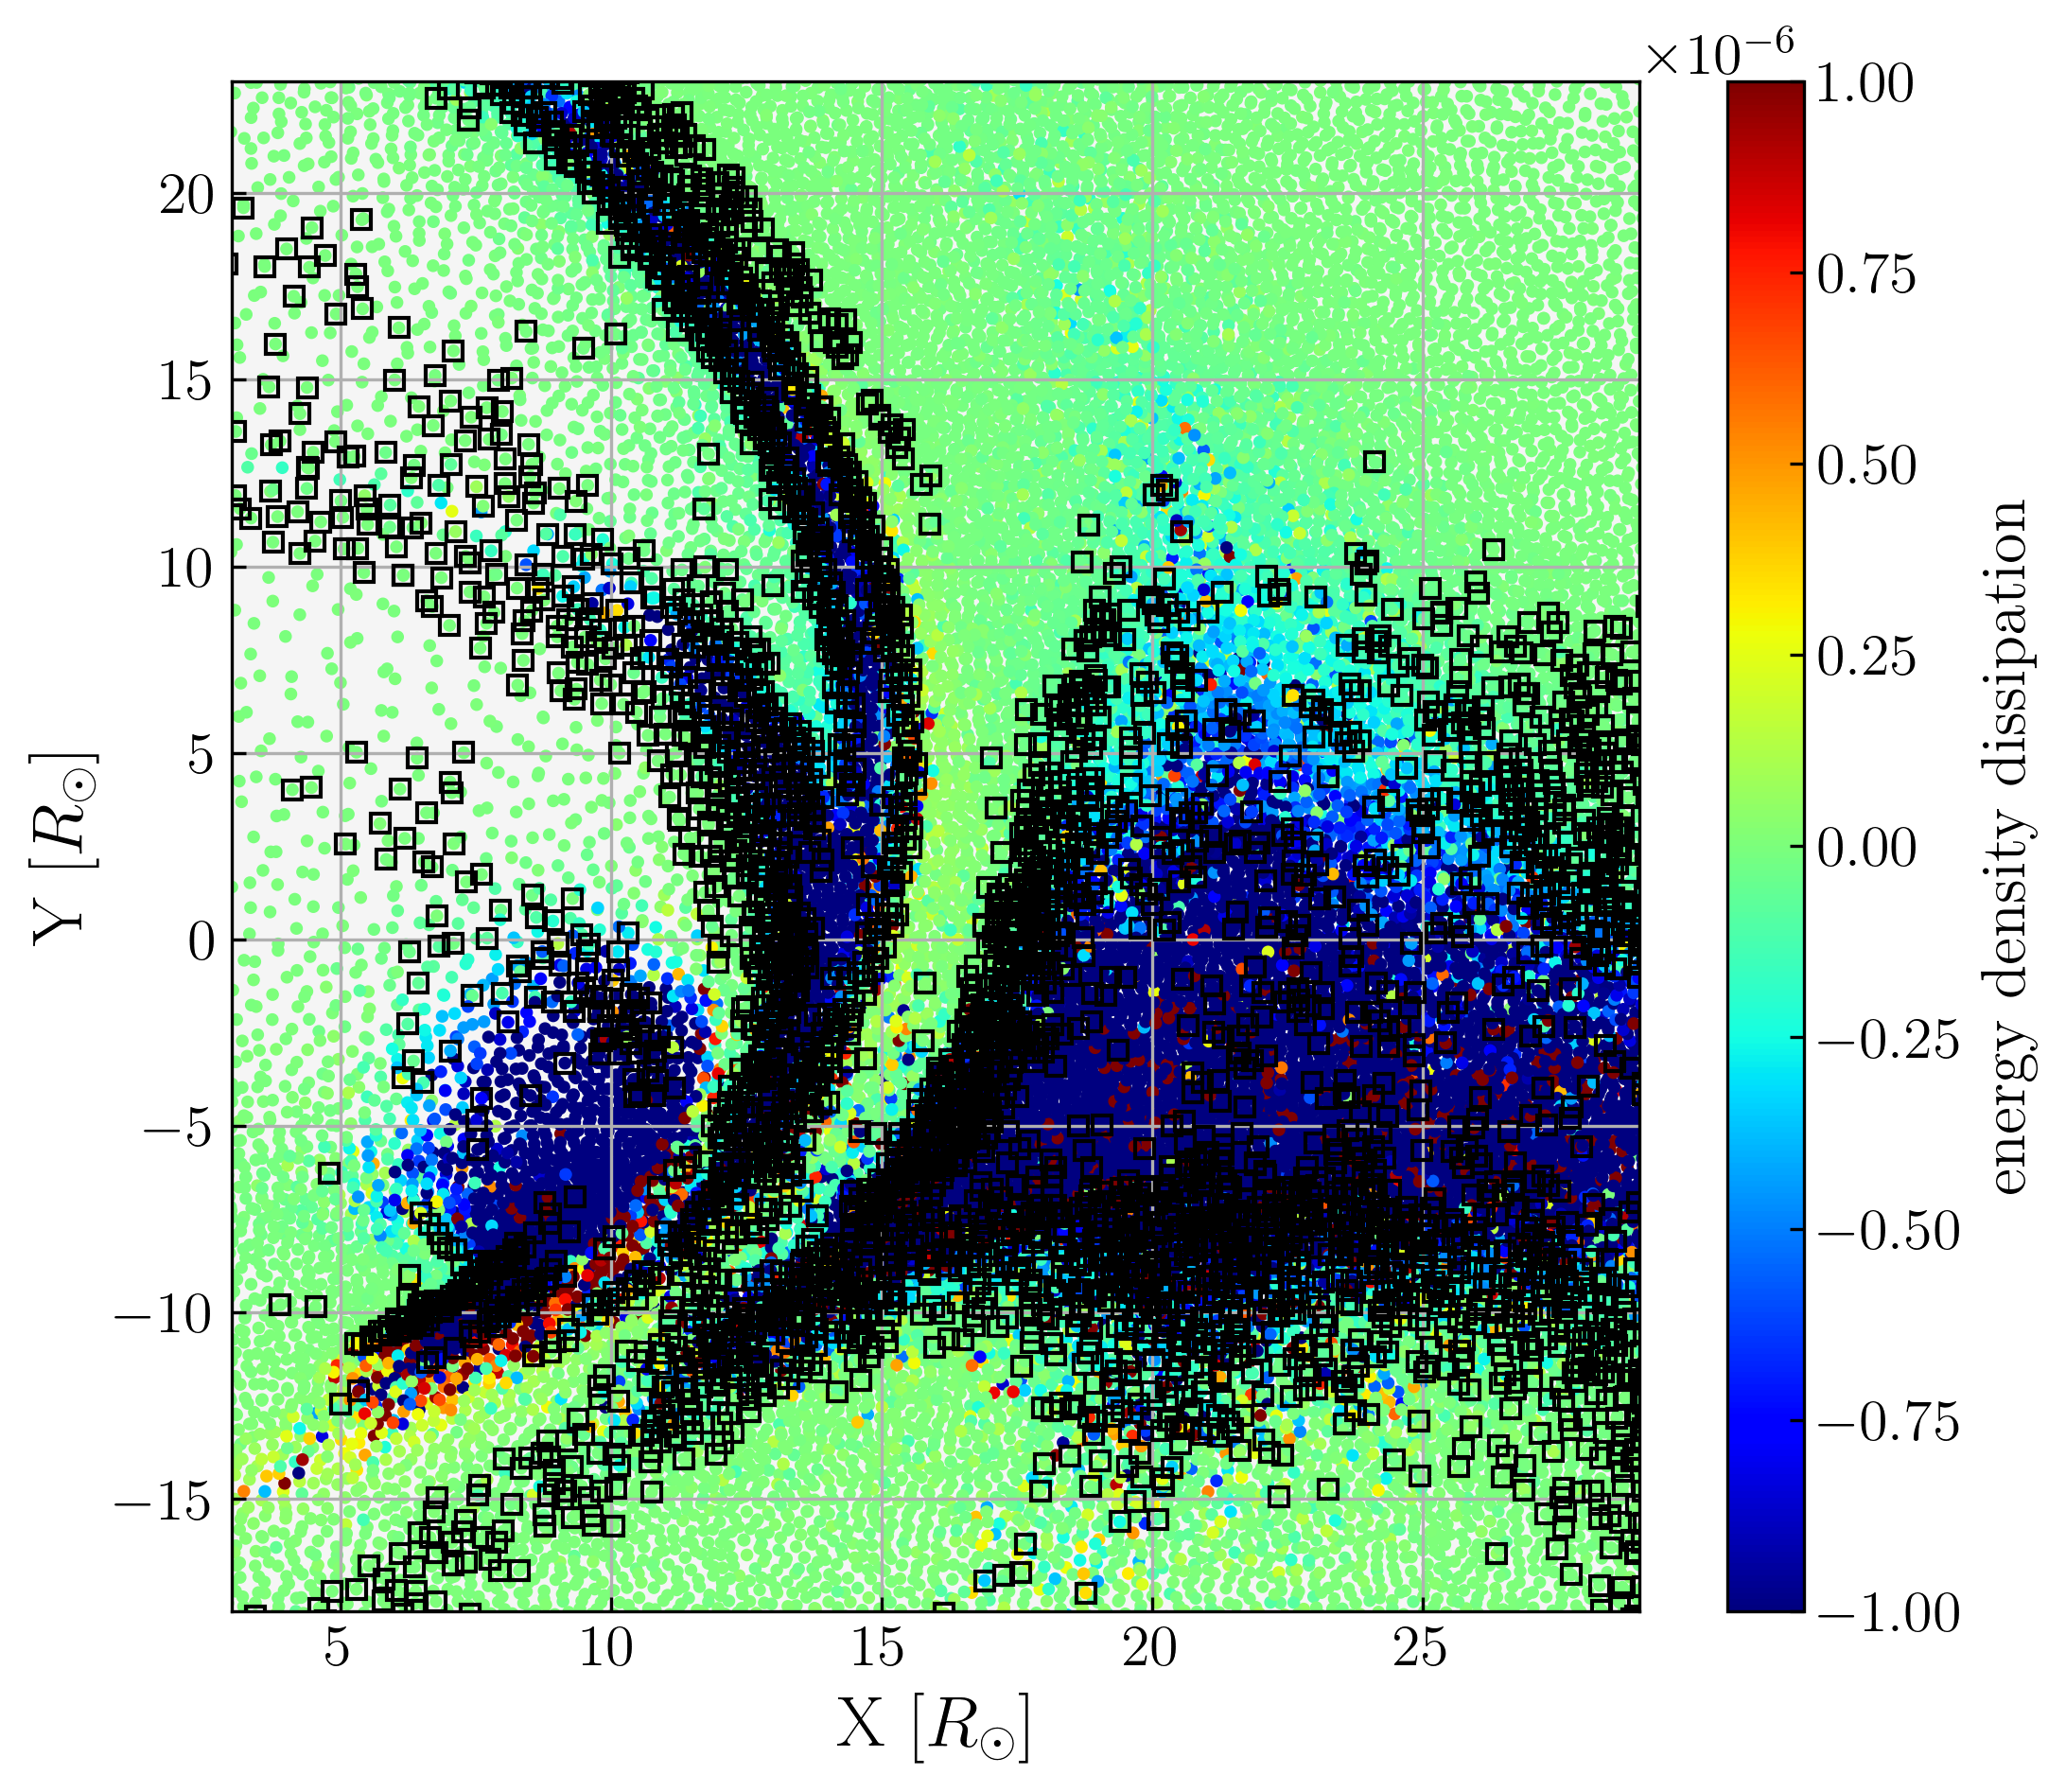

In [30]:
fig, ax = plt.subplots(1,1, figsize = (8,7))
img = ax.scatter(X_cross, Y_cross, c = Diss_cross/Vol_cross, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('energy density dissipation', fontsize = 16)
ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k')
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.savefig('Figs/EnDisszone.png')

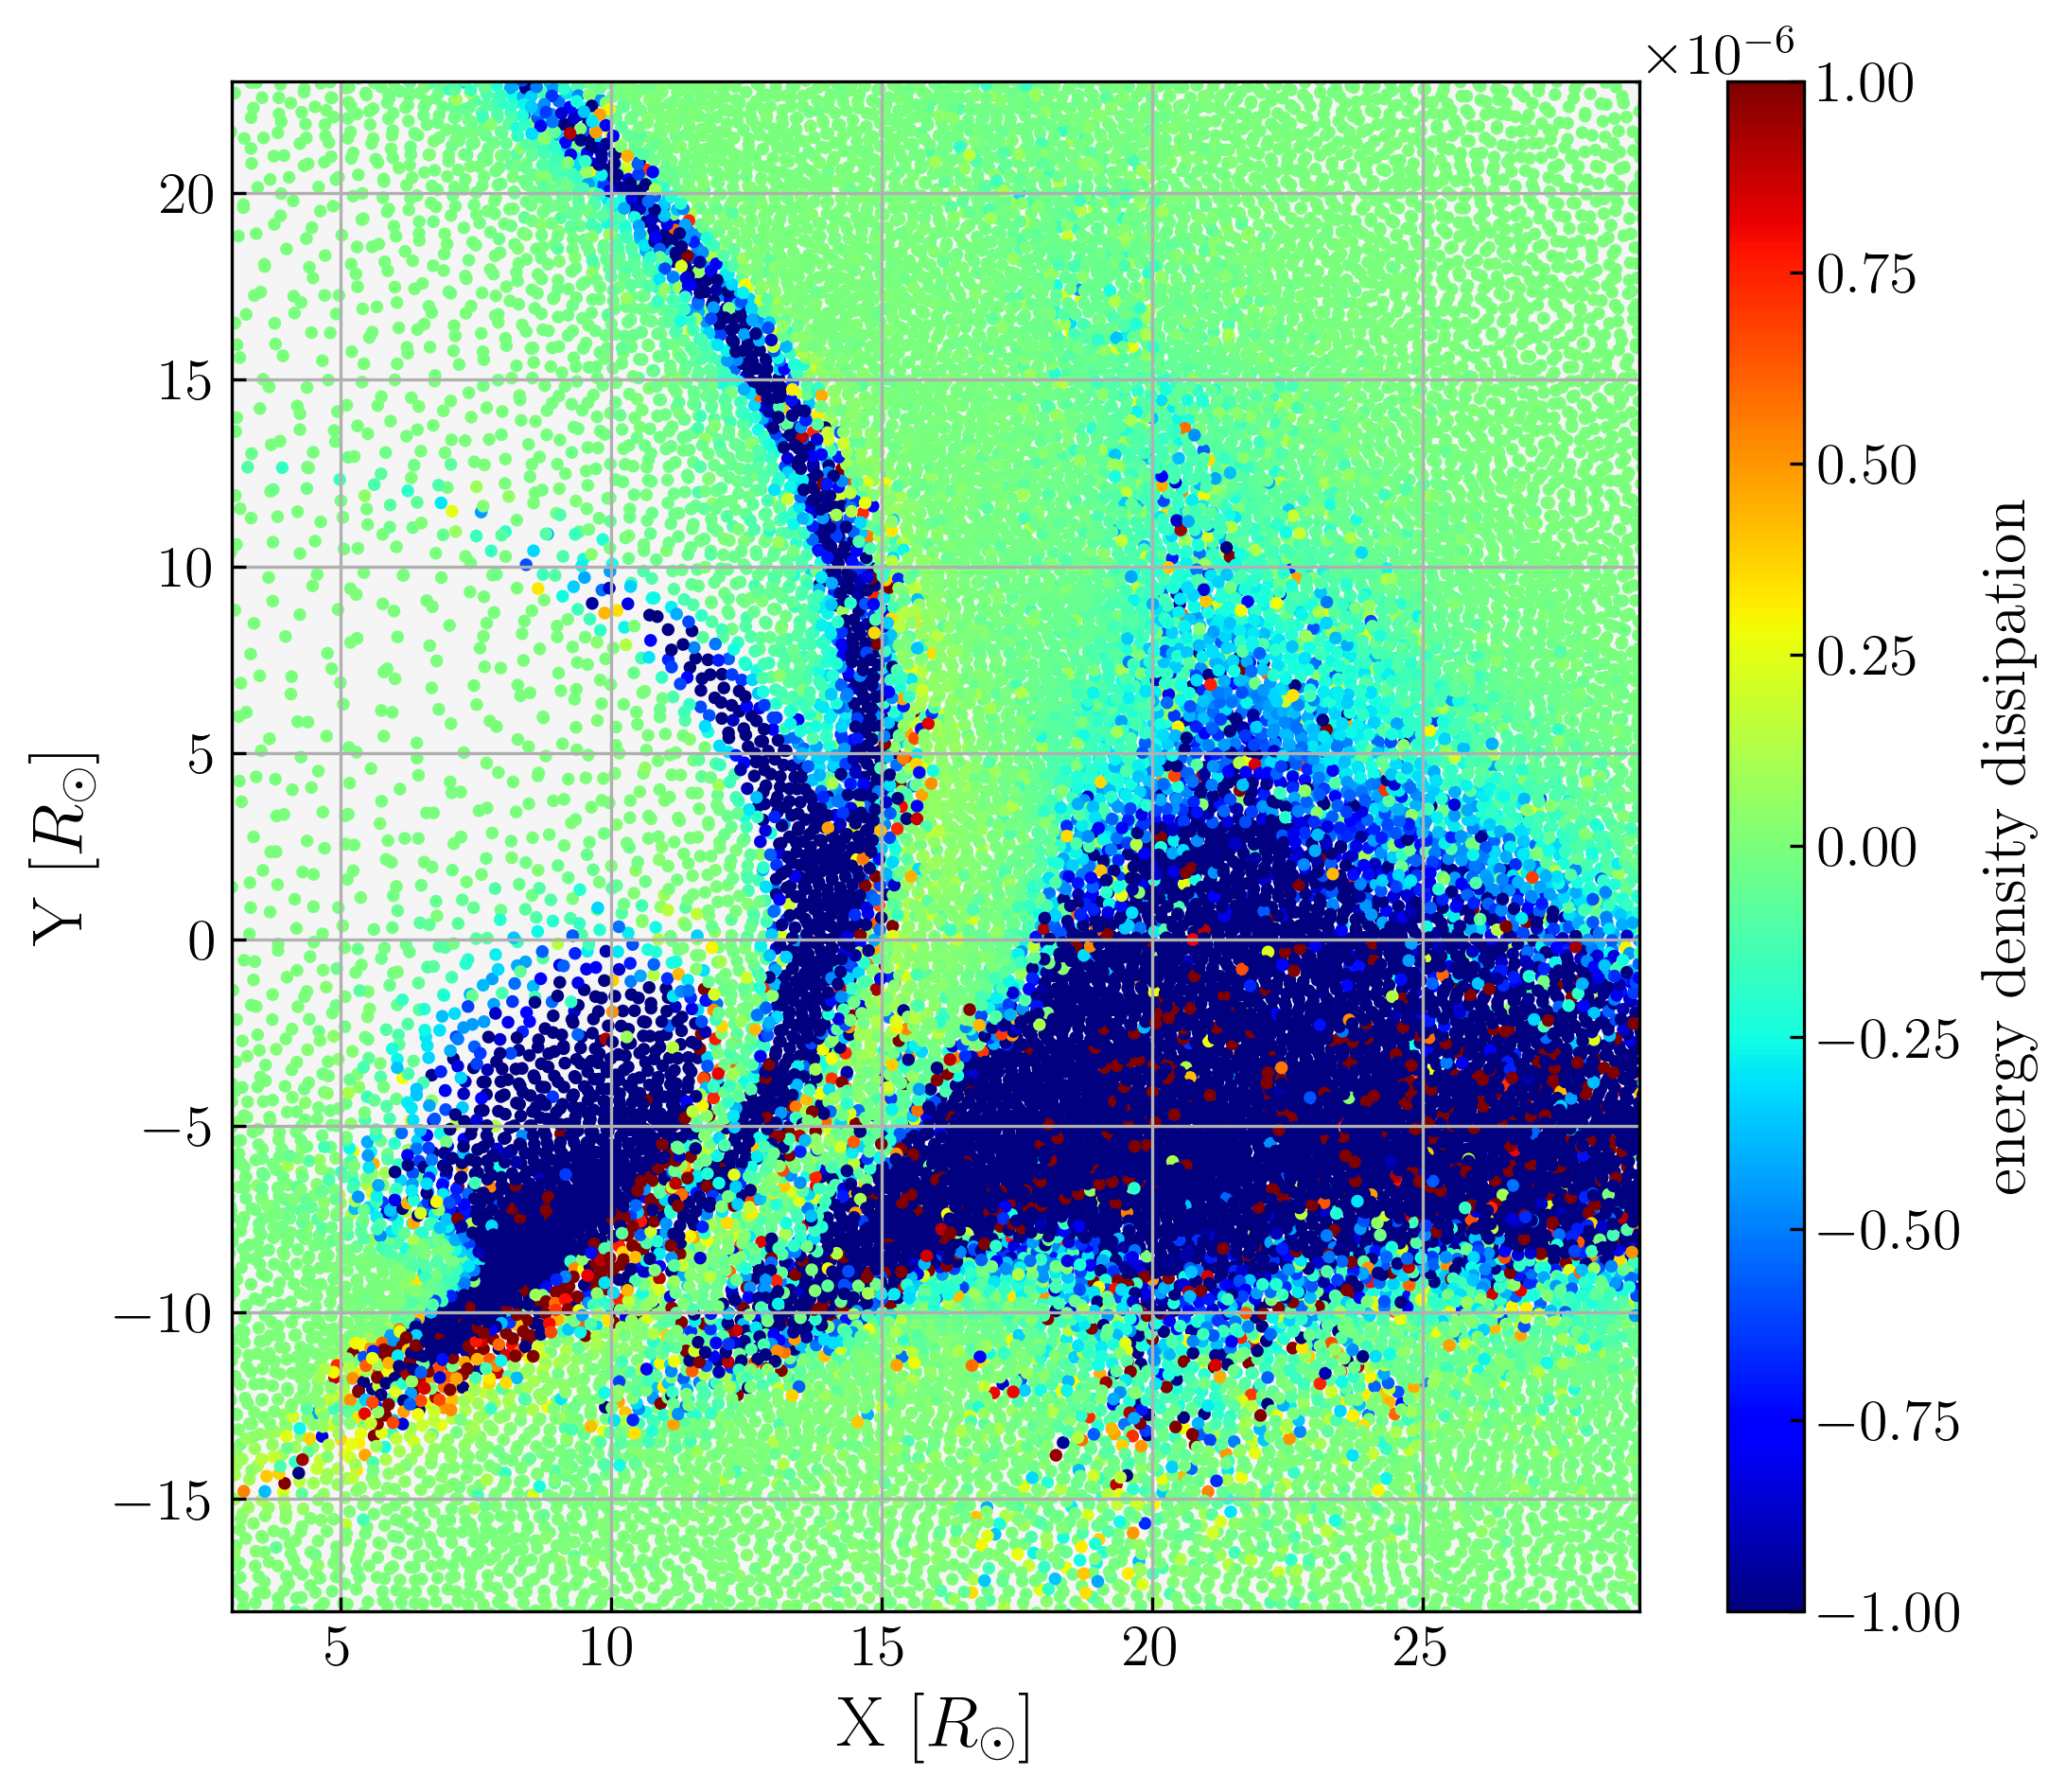

In [29]:
fig, ax = plt.subplots(1,1, figsize = (8,7))
img = ax.scatter(X_cross, Y_cross, c = Diss_cross/Vol_cross, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('energy density dissipation', fontsize = 16)
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.savefig('Figs/EladEnDiss.png')